In [16]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# Normalize images to the range [0, 1]
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

In [4]:
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
# Load pre-trained ResNet50 model (excluding the top layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

94765736/94765736 [==============================] - 148s 2us/step


In [6]:
# Create a sequential model and add the ResNet50 base model
model = Sequential()
model.add(base_model)

In [7]:
# Add custom top layers for the CIFAR-10 task
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [8]:
# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Data augmentation
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
datagen.fit(x_train)

In [13]:
# Training the model
batch_size = 64
epochs = 10

In [11]:
# Checkpoint to save the best model during training
checkpoint = ModelCheckpoint('resnet_transfer_learning.h5', save_best_only=True)

In [14]:
# Fit the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=len(x_train) / batch_size, epochs=epochs,
                    validation_data=(x_test, y_test), callbacks=[checkpoint])

Epoch 1/10
782/781 [==============================] - ETA: -1s - loss: 1.2391 - accuracy: 0.5846

C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


781/781 [==============================] - 1840s 2s/step - loss: 1.2391 - accuracy: 0.5846 - val_loss: 2.4485 - val_accuracy: 0.3365
Epoch 2/10
781/781 [==============================] - 1761s 2s/step - loss: 0.9979 - accuracy: 0.6635 - val_loss: 1.3428 - val_accuracy: 0.5793
Epoch 3/10
781/781 [==============================] - 1691s 2s/step - loss: 0.8515 - accuracy: 0.7150 - val_loss: 1.1335 - val_accuracy: 0.6217
Epoch 4/10
781/781 [==============================] - 1908s 2s/step - loss: 0.9529 - accuracy: 0.6791 - val_loss: 2.0622 - val_accuracy: 0.3717
Epoch 5/10
781/781 [==============================] - 2299s 3s/step - loss: 0.8680 - accuracy: 0.7078 - val_loss: 1.2426 - val_accuracy: 0.6042
Epoch 6/10
781/781 [==============================] - 2293s 3s/step - loss: 0.6905 - accuracy: 0.7660 - val_loss: 1.1293 - val_accuracy: 0.6663
Epoch 7/10
781/781 [==============================] - 2292s 3s/step - loss: 0.6678 - accuracy: 0.7749 - val_loss: 0.8455 - val_accuracy: 0.7299
Epo

In [15]:
# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7767858505249023
Test accuracy: 0.7472000122070312


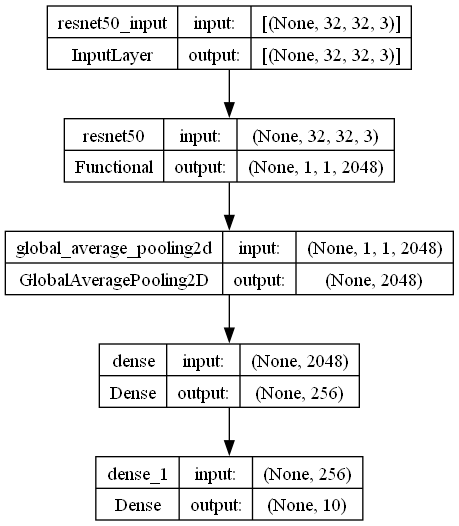

In [17]:
# Plot model architecture
tf.keras.utils.plot_model(model, show_shapes=True, to_file='ResNet_model.png')